<a href="https://colab.research.google.com/github/ShashankDsa/Product_Review_Analysis_FlipKart_Amazon/blob/main/Product_Review_Analysis_FlipKart_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('/content/sample_data/Flipkart_Amazon Mobile Reviews.csv') 
df

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...,...
17063,17063,Don't by try for poco,1.0 out of 5 stars,Other things were good but In gaming performan...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
17064,17064,Very good,5.0 out of 5 stars,Very good mobile,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
17065,17065,Ok Ok,4.0 out of 5 stars,Everything is fine but i felt while charging s...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
17066,17066,Face look nd battery backup is osm,5.0 out of 5 stars,over all in this price like 7700 is fab option...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."


In [3]:
df.describe(include='object')

,Review-Title,rating,Review-Body,Product Name
count,17067,17068,16595,17067
unique,10764,5,13118,5
top,Good,5.0 out of 5 stars,Good,"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)"
freq,1039,7142,792,4330


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17068 entries, 0 to 17067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    17068 non-null  int64 
 1   Review-Title  17067 non-null  object
 2   rating        17068 non-null  object
 3   Review-Body   16595 non-null  object
 4   Product Name  17067 non-null  object
dtypes: int64(1), object(4)
memory usage: 666.8+ KB


In [5]:
df["rating"].value_counts()

5.0 out of 5 stars    7142
1.0 out of 5 stars    3627
4.0 out of 5 stars    3431
3.0 out of 5 stars    1813
2.0 out of 5 stars    1055
Name: rating, dtype: int64

In [6]:
df.isna().sum()

Unnamed: 0        0
Review-Title      1
rating            0
Review-Body     473
Product Name      1
dtype: int64

### **EDA**

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(16593, 5)

In [9]:
df["rating"].replace({"5.0 out of 5 stars": 5,
                     "4.0 out of 5 stars": 4,
                     "3.0 out of 5 stars": 3,
                     "2.0 out of 5 stars": 2,
                     "1.0 out of 5 stars": 1}, inplace=True)

df["rating"].value_counts()

5    6876
1    3577
4    3334
3    1771
2    1035
Name: rating, dtype: int64

In [10]:
df

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...,...
17062,17062,no,4,"This product is good,but missing function and ...","Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
17063,17063,Don't by try for poco,1,Other things were good but In gaming performan...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
17064,17064,Very good,5,Very good mobile,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
17065,17065,Ok Ok,4,Everything is fine but i felt while charging s...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."


Text(0, 0.5, 'Count')

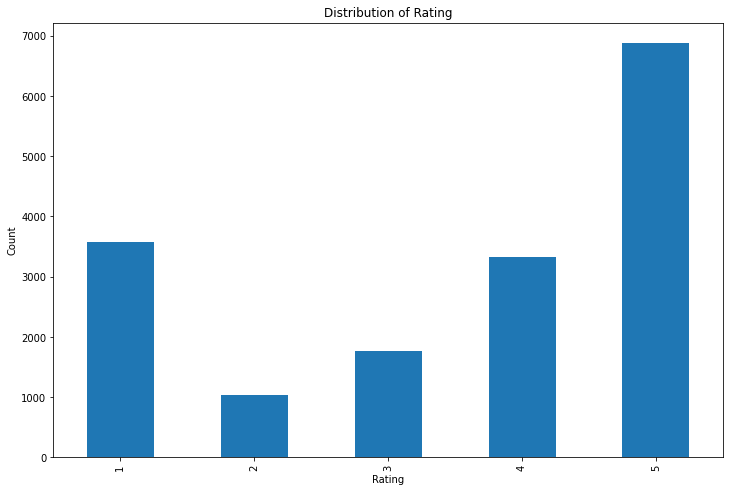

In [11]:
plt.figure(figsize=(12,8))
df["rating"].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

In [12]:
df['Brands'] = df['Product Name'].str.split(' ').str[0]

In [13]:
df

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Brands
0,0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus
...,...,...,...,...,...,...
17062,17062,no,4,"This product is good,but missing function and ...","Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi
17063,17063,Don't by try for poco,1,Other things were good but In gaming performan...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi
17064,17064,Very good,5,Very good mobile,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi
17065,17065,Ok Ok,4,Everything is fine but i felt while charging s...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi


Text(0.5, 1.0, 'Number of Reviews for different Brands')

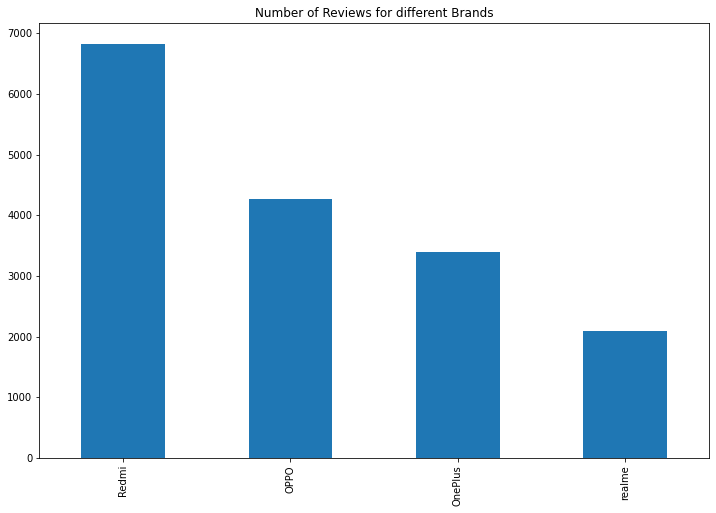

In [14]:
brands = df['Brands'].value_counts()
plt.figure(figsize=(12,8))
brands[:].plot(kind='bar')
plt.title("Number of Reviews for different Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 10 Products')

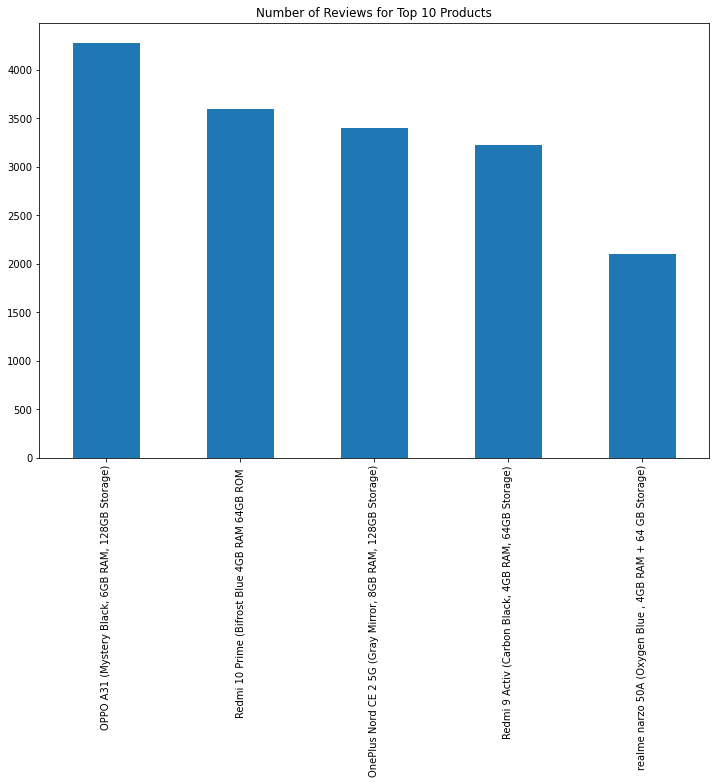

In [15]:
models = df["Product Name"].value_counts()
plt.figure(figsize=(12,8))
models[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 10 Products")

### **Pre-Processing**

In [16]:
prod1 = df[['rating','Review-Body']]
prod1.head()

,rating,Review-Body
0,1,Hang problem
1,2,I'm writing this review after using 3days !!!B...
2,5,Camera is so good n very fast phone back look ...
3,3,The media could not be loaded.\n ...
4,1,I got my delivery on 23 feb when I unboxed the...


In [17]:
def assign_sentiment(rating):
  if float(rating) >= 3:
    return "Positive"
  else:
    return "Negative"
prod1['sentiment'] = prod1['rating'].apply(assign_sentiment)
prod1.head()

,rating,Review-Body,sentiment
0,1,Hang problem,Negative
1,2,I'm writing this review after using 3days !!!B...,Negative
2,5,Camera is so good n very fast phone back look ...,Positive
3,3,The media could not be loaded.\n ...,Positive
4,1,I got my delivery on 23 feb when I unboxed the...,Negative


In [18]:
prod1.drop('rating', inplace=True, axis=1)
prod1.head()

,Review-Body,sentiment
0,Hang problem,Negative
1,I'm writing this review after using 3days !!!B...,Negative
2,Camera is so good n very fast phone back look ...,Positive
3,The media could not be loaded.\n ...,Positive
4,I got my delivery on 23 feb when I unboxed the...,Negative


### Removing punctuation (.!<>{}’,”(/)-)

In [19]:
prod1["Review-Body"]

0                                             Hang problem
1        I'm writing this review after using 3days !!!B...
2        Camera is so good n very fast phone back look ...
3        The media could not be loaded.\n              ...
4        I got my delivery on 23 feb when I unboxed the...
                               ...                        
17062    This product is good,but missing function and ...
17063    Other things were good but In gaming performan...
17064                                     Very good mobile
17065    Everything is fine but i felt while charging s...
17066    over all in this price like 7700 is fab option...
Name: Review-Body, Length: 16593, dtype: object

In [20]:
# Replacing punctuations with space
prod1["Review-Body_processed"] = prod1["Review-Body"].str.replace("[^a-zA-Z0-9]", " ") 

# Re ordering columns
prod1 = prod1[['Review-Body','Review-Body_processed','sentiment']]

In [21]:
prod1["Review-Body_processed"]

0                                             Hang problem
1        I m writing this review after using 3days    B...
2        Camera is so good n very fast phone back look ...
3        The media could not be loaded                 ...
4        I got my delivery on 23 feb when I unboxed the...
                               ...                        
17062    This product is good but missing function and ...
17063    Other things were good but In gaming performan...
17064                                     Very good mobile
17065    Everything is fine but i felt while charging s...
17066    over all in this price like 7700 is fab option...
Name: Review-Body_processed, Length: 16593, dtype: object

### Replacing short words


In [22]:
prod1["Review-Body_processed"] = prod1["Review-Body_processed"].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
prod1["Review-Body_processed"]

0                                             Hang problem
1        writing this review after using 3days honest t...
2        Camera good very fast phone back look awesomeW...
3        The media could not loaded average product dec...
4        got delivery feb when unboxed the phone the di...
                               ...                        
17062    This product good but missing function and mor...
17063    Other things were good but gaming performance ...
17064                                     Very good mobile
17065    Everything fine but felt while charging someti...
17066    over all this price like 7700 fab option like ...
Name: Review-Body_processed, Length: 16593, dtype: object

In [23]:
# make entire text lowercase
prod1["Review-Body_processed"] = [review.lower() for review in prod1["Review-Body_processed"]]
prod1["Review-Body_processed"]

0                                             hang problem
1        writing this review after using 3days honest t...
2        camera good very fast phone back look awesomew...
3        the media could not loaded average product dec...
4        got delivery feb when unboxed the phone the di...
                               ...                        
17062    this product good but missing function and mor...
17063    other things were good but gaming performance ...
17064                                     very good mobile
17065    everything fine but felt while charging someti...
17066    over all this price like 7700 fab option like ...
Name: Review-Body_processed, Length: 16593, dtype: object

### Removal of Stopwords

In [24]:
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['http','www','com','amazon','flipkart','also','get']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
prod1["Review-Body_processed"] = [remove_stopwords(r) for r in prod1["Review-Body_processed"]]

In [25]:
prod1["Review-Body_processed"]

0                                             hang problem
1        writing review using 3days honest normal andro...
2        camera good fast phone back look awesomewith d...
3        media could loaded average product decent day ...
4        got delivery feb unboxed phone display damaged...
                               ...                        
17062    product good missing function thaan work one time
17063    things good gaming performance low end device ...
17064                                          good mobile
17065    everything fine felt charging sometimes gets h...
17066              price like 7700 fab option like itthnxs
Name: Review-Body_processed, Length: 16593, dtype: object

### Lemmatization

In [26]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

prod1["Review-Body_processed"] = prod1["Review-Body_processed"].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [27]:
prod1["Review-Body_processed"]

0                                             hang problem
1        write review use 3days honest normal android p...
2        camera good fast phone back look awesomewith d...
3        medium could load average product decent day d...
4        get delivery feb unboxed phone display damage ...
                               ...                        
17062       product good miss function thaan work one time
17063     thing good game performance low end device waste
17064                                          good mobile
17065     everything fine felt charge sometimes get heated
17066              price like 7700 fab option like itthnxs
Name: Review-Body_processed, Length: 16593, dtype: object

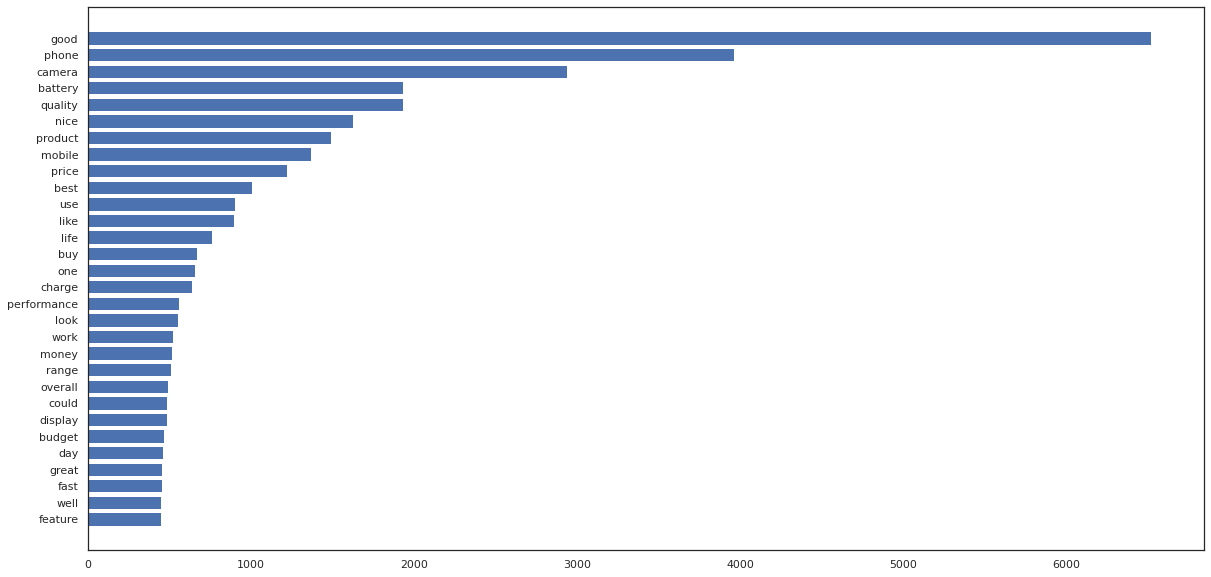

In [28]:
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_tweets = prod1.loc[prod1['sentiment'] == 'Positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_tweets["Review-Body_processed"]])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

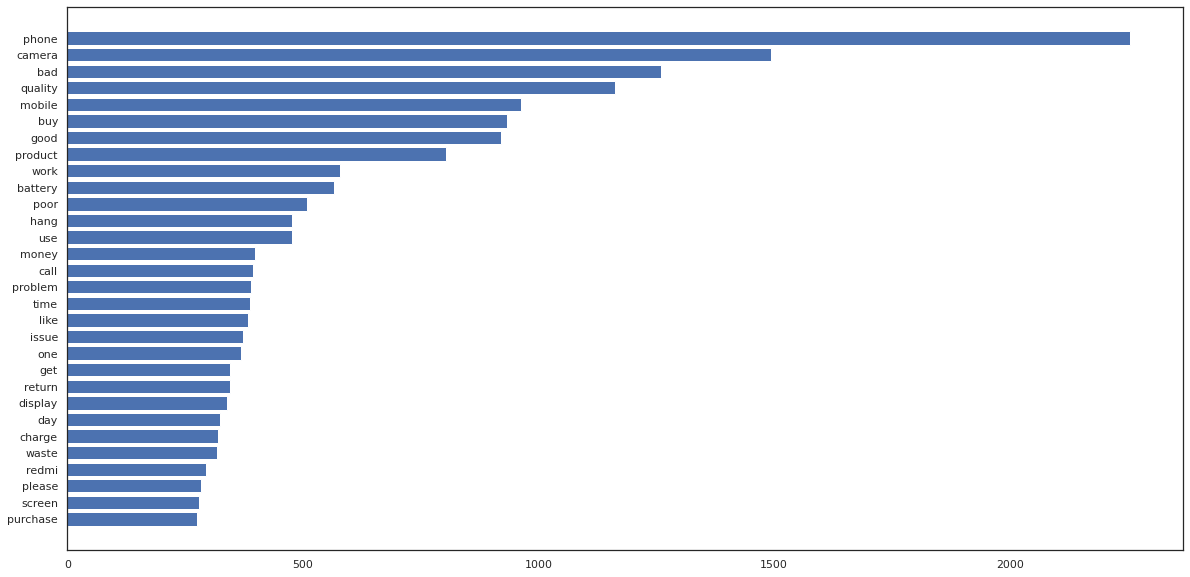

In [29]:
## Plotting most frequent words from negative reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset negative review dataset
all_words_tweets = prod1.loc[prod1['sentiment'] == 'Negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_tweets["Review-Body_processed"]])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

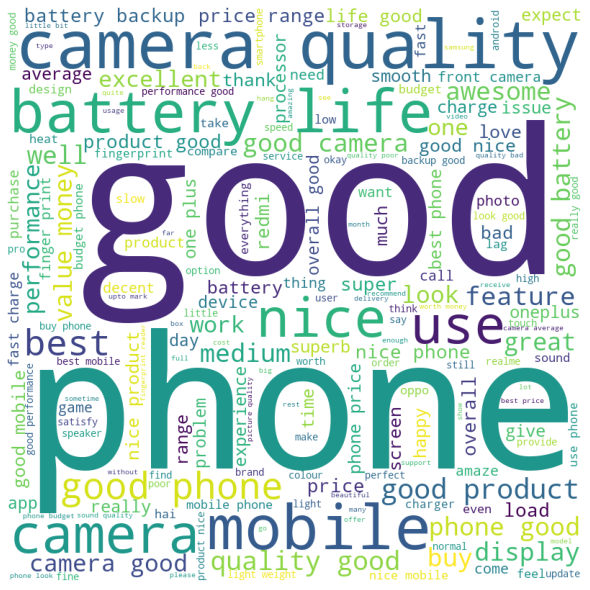

In [30]:
## Building a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = prod1.loc[prod1['sentiment'] == 'Positive',:]
all_words = ' '.join([text for text in word_cloud_df['Review-Body_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

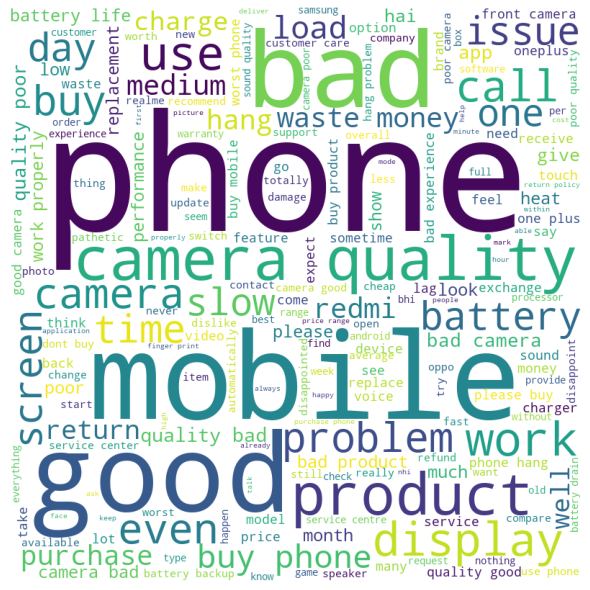

In [31]:
word_cloud_df = prod1.loc[prod1['sentiment'] == 'Negative',:]
all_words = ' '.join([text for text in word_cloud_df['Review-Body_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### **Bag of Words**

In [32]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

# Creating sparse matrix of top 3000 tokens
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(prod1["Review-Body_processed"]).toarray()
le = preprocessing.LabelEncoder()
le.fit(prod1["sentiment"])
Y = le.transform(prod1["sentiment"])
featureNames = tfidf.get_feature_names()

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [33]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07557963, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
Y

array([0, 0, 1, ..., 1, 1, 1])

In [35]:
X_train.shape, X_test.shape

((12444, 3000), (4149, 3000))

### **Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty="l2", solver = "saga")

In [37]:
lr.fit(X_train,Y_train)

LogisticRegression(solver='saga')

In [38]:
lr.predict(X_test)

array([1, 0, 1, ..., 0, 1, 1])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr.predict(X_test), target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.77      0.64      0.70      1140
    Negative       0.87      0.93      0.90      3009

    accuracy                           0.85      4149
   macro avg       0.82      0.78      0.80      4149
weighted avg       0.84      0.85      0.84      4149



In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])

0.9019664690140106

### **Naive Bayes**

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [42]:
print(classification_report(Y_test, classifier.predict(X_test), target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.80      0.58      0.67      1140
    Negative       0.86      0.94      0.90      3009

    accuracy                           0.84      4149
   macro avg       0.83      0.76      0.79      4149
weighted avg       0.84      0.84      0.84      4149



In [43]:
roc_auc_score(Y_test, classifier.predict_proba(X_test)[:, 1])

0.8982279768880493

### **Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, criterion = "entropy")
RF.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [45]:
RF.predict(X_test)

array([1, 0, 1, ..., 0, 1, 1])

In [46]:
print(classification_report(Y_test, RF.predict(X_test), target_names=['Positive','Negative']))

              precision    recall  f1-score   support

    Positive       0.75      0.66      0.71      1140
    Negative       0.88      0.92      0.90      3009

    accuracy                           0.85      4149
   macro avg       0.82      0.79      0.80      4149
weighted avg       0.84      0.85      0.84      4149



In [47]:
roc_auc_score(Y_test, RF.predict_proba(X_test)[:, 1])

0.8921008903115215

### Logistic Regression model gives better AU-ROC score of 0.911 when compared to other 2 models

In [57]:
df["sentiment"] = prod1["sentiment"]
df

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name,Brands,sentiment
0,0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Negative
1,1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Negative
2,2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Positive
3,3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Positive
4,4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus,Negative
...,...,...,...,...,...,...,...
17062,17062,no,4,"This product is good,but missing function and ...","Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi,Positive
17063,17063,Don't by try for poco,1,Other things were good but In gaming performan...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi,Negative
17064,17064,Very good,5,Very good mobile,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi,Positive
17065,17065,Ok Ok,4,Everything is fine but i felt while charging s...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Redmi,Positive


In [58]:
reviews_count = df.groupby("Product Name")["sentiment"].value_counts().to_frame()
reviews_count

sentiment
Product Name                                       sentiment           
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)   Positive        3254
                                                   Negative        1019
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128... Positive        2616
                                                   Negative         780
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM      Positive        2311
                                                   Negative        1286
Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Stor... Positive        2205
                                                   Negative        1022
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB... Positive        1595
                                                   Negative         505

In [59]:
review_percent = reviews_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
review_percent

sentiment
Product Name                                       sentiment           
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)   Positive   76.152586
                                                   Negative   23.847414
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128... Positive   77.031802
                                                   Negative   22.968198
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM      Positive   64.247984
                                                   Negative   35.752016
Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Stor... Positive   68.329718
                                                   Negative   31.670282
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB... Positive   75.952381
                                                   Negative   24.047619

In [60]:
avg_rating = df.groupby("Product Name")["rating"].mean().to_frame()
avg_rating

,rating
Product Name,
"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",3.723145
"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",3.727621
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,3.251043
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)",3.327239
"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)",3.655714


In [55]:
avg_rating.sort_values("rating",axis=0, ascending = False, inplace = True)
avg_rating

,rating
Product Name,
"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",3.727621
"OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)",3.723145
"realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)",3.655714
"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)",3.327239
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,3.251043


### OnePlus Nord CE 2 5G and OPPO A31 has overall higher ratings in comparison to the other phones